# Elliptical Trap Simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import src.analysis as src
from multiprocessing import Process, Queue
import pandas as pd
import time
from tqdm import tqdm

plt.gcf().subplots_adjust(bottom=0.15)
%load_ext autoreload
%autoreload 2

### 10 Particles

In [2]:
conf = src.config()
cutoff = 500

conf["directory"] = "elliptical_10_interacting"
conf["threads"] = 12

conf["numPart"] = 10
conf["numDim"] = 3
conf["numSteps"] = 2**20 + cutoff
conf["stepLength"] = 0.5
conf["importanceSampling"] = 1

conf["alpha"] = 0.5
conf["a"] = 0.0043

conf["InitialState"] = "HardshellInitial"
conf["Wavefunction"] = "EllipticalHardshellWavefunction"
conf["Hamiltonian"] = "EllipticalOscillator"

#### Gradient decent

In [3]:
mu = 0.01

for i in range(5):
    src.runner(conf)
    localEnergies, _, psiGrad, acceptanceRate = src.readData(conf)
    gradient = src.calculateGradient(localEnergies, psiGrad)
    conf["alpha"] -= mu*gradient
    print(f"gradient: {gradient:.5f}. alpha: {conf['alpha']:.5f}. acceptance rate: {acceptanceRate[0]:.5f}.")

gradient: 0.25912. alpha: 0.49741. acceptance rate: 0.62735.
gradient: -0.00247. alpha: 0.49743. acceptance rate: 0.62978.
gradient: 0.00085. alpha: 0.49743. acceptance rate: 0.62976.
gradient: -0.00100. alpha: 0.49744. acceptance rate: 0.62977.
gradient: 0.00098. alpha: 0.49743. acceptance rate: 0.62976.


#### Using optimal alpha

In [4]:
conf["numSteps"] = 2**20 + cutoff
conf["alpha"] = 0.49752

In [5]:
src.runner(conf, verbose = True)

Starting simulation
numPart: 10
numDim: 3
numSteps: 1049076
stepLength: 0.5
importanceSampling: 1
alpha: 0.49752
a: 0.0043
omega: 1
InitialState: HardshellInitial
WaveFunction: EllipticalHardshellWavefunction
Hamiltonian: EllipticalOscillator
Done!
------------


In [6]:
localEnergies, _, psiGrad, acceptanceRate = src.readData(conf, cutoff, readPos = False)
localEnergies = np.concatenate(localEnergies)

bins = np.linspace(0, 3, 200)
densityInteracting = src.densityParallel(conf, bins)/conf["numSteps"]

100%|██████████| 10490760/10490760 [00:13<00:00, 754741.29it/s]


In [7]:
conf["directory"] = "elliptical_10_noninteracting"
conf["a"] = 0 

In [8]:
src.runner(conf, verbose = True)

Starting simulation
numPart: 10
numDim: 3
numSteps: 1049076
stepLength: 0.5
importanceSampling: 1
alpha: 0.49752
a: 0
omega: 1
InitialState: HardshellInitial
WaveFunction: EllipticalHardshellWavefunction
Hamiltonian: EllipticalOscillator
Done!
------------


In [9]:
bins = np.linspace(0, 3, 200)
densityNonInteracting = src.densityParallel(conf, bins)/conf["numSteps"]

100%|██████████| 10490760/10490760 [00:13<00:00, 782260.81it/s]


#### Estimation of energy and uncertainty

In [10]:
E = np.mean(localEnergies)
Var = src.blocking(localEnergies, 18)

100%|██████████| 18/18 [00:52<00:00,  2.91s/it]


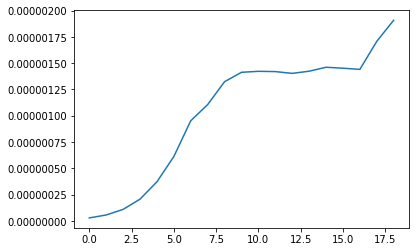

In [11]:
plt.plot(Var)
plt.show()

In [12]:
print(f"<E> = {E} +- {np.sqrt(Var[9])}")

<E> = 24.398477790886265 +- 0.0011886200428013818


#### Radial onebody density

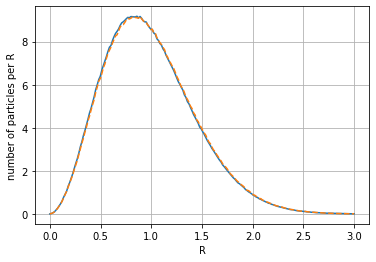

In [13]:
fig = plt.figure()
plt.plot(bins, densityNonInteracting)
plt.plot(bins, densityInteracting, "--")
plt.xlabel("R")
plt.ylabel("number of particles per R")
plt.grid()
plt.show()
fig.savefig("figures/density10.pdf", bbox_inches = "tight")

### 50 particles

In [14]:
conf = src.config()
cutoff = 2000

conf["threads"] = 12

conf["numPart"] = 50
conf["numDim"] = 3
conf["numSteps"] = 2**20 + cutoff
conf["stepLength"] = 0.5
conf["importanceSampling"] = 1

conf["alpha"] = 0.49752
conf["a"] = 0.0043

conf["InitialState"] = "HardshellInitial"
conf["Wavefunction"] = "EllipticalHardshellWavefunction"
conf["Hamiltonian"] = "EllipticalOscillator"

In [15]:
mu = 0.001

for i in range(5):
    src.runner(conf)
    localEnergies, _, psiGrad, acceptanceRate = src.readData(conf, cutoff, readPos = False)
    gradient = src.calculateGradient(localEnergies, psiGrad)
    conf["alpha"] -= mu*gradient
    print(f"gradient: {gradient:.5f}. alpha: {conf['alpha']:.5f}. acceptance rate: {acceptanceRate[0]:.5f}.")

gradient: 4.12064. alpha: 0.49340. acceptance rate: 0.64611.
gradient: 2.27719. alpha: 0.49112. acceptance rate: 0.64988.
gradient: 0.93448. alpha: 0.49019. acceptance rate: 0.65196.
gradient: 1.08126. alpha: 0.48911. acceptance rate: 0.65279.
gradient: 0.07514. alpha: 0.48903. acceptance rate: 0.65379.


#### Using optimal alpha

In [16]:
conf["directory"] = "elliptical_50_interacting"
conf["alpha"] = 0.48903

In [17]:
src.runner(conf, verbose = True)

Starting simulation
numPart: 50
numDim: 3
numSteps: 1050576
stepLength: 0.5
importanceSampling: 1
alpha: 0.48903
a: 0.0043
omega: 1
InitialState: HardshellInitial
WaveFunction: EllipticalHardshellWavefunction
Hamiltonian: EllipticalOscillator
Done!
------------


In [18]:
localEnergies, _, psiGrad, acceptanceRate = src.readData(conf, cutoff, readPos = False)
localEnergies = np.concatenate(localEnergies)

bins = np.linspace(0, 3, 200)
conf["threads"] = 6 #downscale, to avoid using too much memory
densityInteracting = src.densityParallel(conf, bins)/conf["numSteps"]

100%|██████████| 52528800/52528800 [00:55<00:00, 949862.40it/s] 


In [19]:
conf["directory"] = "elliptical_50_noninteracting"
conf["alpha"] = 0.48903
conf["a"] = 0

In [20]:
src.runner(conf, verbose = True)

Starting simulation
numPart: 50
numDim: 3
numSteps: 1050576
stepLength: 0.5
importanceSampling: 1
alpha: 0.48903
a: 0
omega: 1
InitialState: HardshellInitial
WaveFunction: EllipticalHardshellWavefunction
Hamiltonian: EllipticalOscillator
Done!
------------


In [21]:
bins = np.linspace(0, 3, 200)
densityNonInteracting = src.densityParallel(conf, bins)/conf["numSteps"]

100%|██████████| 52528800/52528800 [00:54<00:00, 959578.33it/s] 


#### Estimation of energy and uncertainty

In [22]:
E = np.mean(localEnergies)
Var = src.blocking(localEnergies, 18)

100%|██████████| 18/18 [00:51<00:00,  2.87s/it]


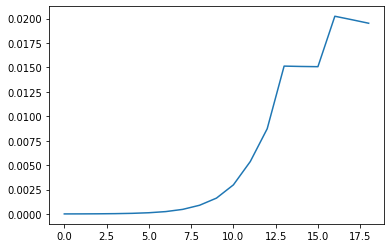

In [23]:
plt.plot(Var)
plt.show()

In [24]:
print(f"<E> = {E} +- {np.sqrt(Var[13])}")

<E> = 127.37989862150846 +- 0.12304662071136907


#### Radial onebody density

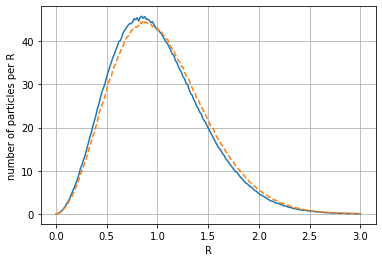

In [25]:
fig = plt.figure()
plt.plot(bins, densityNonInteracting)
plt.plot(bins, densityInteracting, "--")
plt.xlabel("R")
plt.ylabel("number of particles per R")
plt.grid()
plt.show()
fig.savefig("figures/density50.pdf", bbox_inches = "tight")

### 100 Particles

In [26]:
conf = src.config()
cutoff = 2000

conf["threads"] = 12

conf["numPart"] = 100
conf["numDim"] = 3
conf["numSteps"] = 2**20 + cutoff
conf["stepLength"] = 0.5
conf["importanceSampling"] = 1

conf["alpha"] = 0.48903
conf["a"] = 0.0043

conf["InitialState"] = "HardshellInitial"
conf["Wavefunction"] = "EllipticalHardshellWavefunction"
conf["Hamiltonian"] = "EllipticalOscillator"

In [27]:
mu = 0.001

for i in range(5):
    src.runner(conf)
    localEnergies, _, psiGrad, acceptanceRate = src.readData(conf, cutoff, readPos = False)
    gradient = src.calculateGradient(localEnergies, psiGrad)
    conf["alpha"] -= mu*gradient
    print(f"gradient: {gradient:.5f}. alpha: {conf['alpha']:.5f}. acceptance rate: {acceptanceRate[0]:.5f}.")

gradient: 8.97470. alpha: 0.48006. acceptance rate: 0.66570.
gradient: -2.12743. alpha: 0.48218. acceptance rate: 0.67375.
gradient: 0.93860. alpha: 0.48124. acceptance rate: 0.67187.
gradient: 2.76470. alpha: 0.47848. acceptance rate: 0.67276.
gradient: -3.11632. alpha: 0.48160. acceptance rate: 0.67520.


#### Using optimal alpha

In [28]:
conf["directory"] = "elliptical_100_interacting"
conf["alpha"] = 0.48160

In [29]:
src.runner(conf, verbose = True)

Starting simulation
numPart: 100
numDim: 3
numSteps: 1050576
stepLength: 0.5
importanceSampling: 1
alpha: 0.4816
a: 0.0043
omega: 1
InitialState: HardshellInitial
WaveFunction: EllipticalHardshellWavefunction
Hamiltonian: EllipticalOscillator
Done!
------------


In [30]:
localEnergies, _, psiGrad, acceptanceRate = src.readData(conf, cutoff, readPos = False)
localEnergies = np.concatenate(localEnergies)

bins = np.linspace(0, 3, 200)
conf["threads"] = 3 #downscale, to avoid using too much memory
densityInteracting = src.densityParallel(conf, bins)/conf["numSteps"]

100%|██████████| 105057600/105057600 [01:42<00:00, 1022141.10it/s]


In [31]:
conf["directory"] = "elliptical_100_noninteracting"
conf["alpha"] = 0.48160
conf["a"] = 0

In [32]:
src.runner(conf, verbose = True)

Starting simulation
numPart: 100
numDim: 3
numSteps: 1050576
stepLength: 0.5
importanceSampling: 1
alpha: 0.4816
a: 0
omega: 1
InitialState: HardshellInitial
WaveFunction: EllipticalHardshellWavefunction
Hamiltonian: EllipticalOscillator
Done!
------------


In [33]:
bins = np.linspace(0, 3, 200)
densityNonInteracting = src.densityParallel(conf, bins)/conf["numSteps"]

100%|██████████| 105057600/105057600 [01:44<00:00, 1009077.33it/s]


#### Estiamtion of Energy and Uncertainty

100%|██████████| 18/18 [00:52<00:00,  2.94s/it]


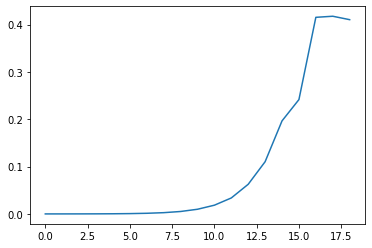

In [34]:
E = np.mean(localEnergies)
Var = src.blocking(localEnergies, 18)
plt.plot(Var)

In [37]:
print(f"<E> = {E} +- {np.sqrt(Var[15])}")

<E> = 265.5433074826718 +- 0.4914128178006312


#### Radial Onebody Density

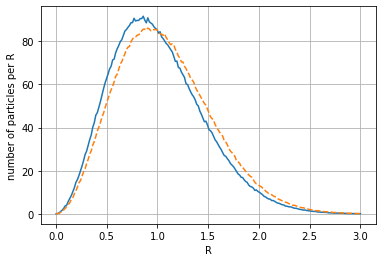

In [36]:
fig = plt.figure()
plt.plot(bins, densityNonInteracting)
plt.plot(bins, densityInteracting, "--")
plt.xlabel("R")
plt.ylabel("number of particles per R")
plt.grid()
plt.show()
fig.savefig("figures/density100.pdf", bbox_inches = "tight")